# Bonusleistung Paket 1

## Übung 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_study_dataset_3_neu.csv')

df.head(10)

,female,age,educational background,Smoker,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack
0,0,58,Abitur,yes,5.0,0.0,0,0,0,215.0,170.0,86.0,29.06,75.0,98.000000,0
1,1,60,Ausbildung,no,0.0,0.0,0,0,0,240.0,137.0,84.0,29.51,82.0,88.000000,0
2,0,38,Abitur,no,0.0,0.0,0,0,0,171.0,111.0,68.0,18.76,90.0,83.000000,0
3,1,53,Master,yes,30.0,0.0,0,0,0,189.0,110.0,67.5,23.59,60.0,63.000000,0
4,1,52,Abitur,yes,15.0,0.0,0,0,0,240.0,94.0,66.5,22.93,70.0,88.000000,0
5,1,41,Ausbildung,yes,40.0,0.0,0,0,0,239.0,119.5,70.0,29.79,70.0,81.963655,0
6,0,37,Master,yes,20.0,0.0,0,0,0,186.0,135.0,91.0,21.48,66.0,84.000000,0
7,1,42,Abitur,no,0.0,0.0,0,0,0,227.0,144.0,78.0,23.75,62.0,97.000000,1
8,0,64,Ausbildung,no,0.0,0.0,0,1,0,273.0,155.0,86.0,27.53,100.0,91.000000,0
9,0,56,Ausbildung,yes,20.0,0.0,0,0,0,212.0,117.5,72.5,27.30,75.0,75.000000,0


## 3.1 Zielvariable bestimmen

Das Modell soll bestimmen, ob eine Person übergewichtig ist oder nicht.
BMI >= 25  -> Übergewichtig

In [3]:
df['high weight'] = np.where(df['BMI'] >= 25, 1, 0)
df['high weight'].describe()

count    4042.000000
mean        0.544532
std         0.498075
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: high weight, dtype: float64

## 3.2 Verteilung der Zielvariable


<AxesSubplot:xlabel='high weight'>

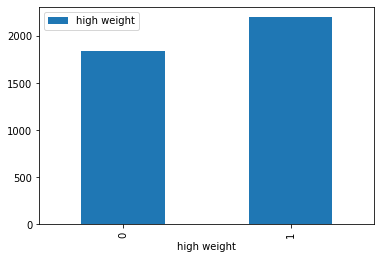

In [34]:
bc = df.groupby('high weight').agg({'high weight':'count'})

bc.plot.bar()

## 3.3 Datenreduktion & -bereinigung

Educational Background ist für die Auswertung nicht wichtig und wird daher entfernt.

In [35]:
df_neu = df.copy().drop(columns=['educational background'])

Nun folgt die Datensäuberung. Lassen Sie sich fehlende Werte anzeigen und führen Sie folgende Schritte der Datensäuberung durch:

1. Fehlende Werte (NaN) mit häufigsten Wert ersetzen (dfClean['Attribut'].mode()[0])
Das Ergebnis sollte in der Variable dfClean stehen.

In [36]:
df_neu.isnull().sum()

female             0
age                0
Smoker             0
cigsPerDay         0
BPMeds             0
hadStroke          0
hadHyp             0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
RiskHeartAttack    0
high weight        0
dtype: int64

In [37]:
dfClean = df_neu.copy()
# Keine Null-Werte vorhanden

In [38]:
dfClean.head(15)

,female,age,Smoker,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack,high weight
0,0,58,yes,5.0,0.0,0,0,0,215.0,170.0,86.0,29.06,75.0,98.000000,0,1
1,1,60,no,0.0,0.0,0,0,0,240.0,137.0,84.0,29.51,82.0,88.000000,0,1
2,0,38,no,0.0,0.0,0,0,0,171.0,111.0,68.0,18.76,90.0,83.000000,0,0
3,1,53,yes,30.0,0.0,0,0,0,189.0,110.0,67.5,23.59,60.0,63.000000,0,0
4,1,52,yes,15.0,0.0,0,0,0,240.0,94.0,66.5,22.93,70.0,88.000000,0,0
5,1,41,yes,40.0,0.0,0,0,0,239.0,119.5,70.0,29.79,70.0,81.963655,0,1
6,0,37,yes,20.0,0.0,0,0,0,186.0,135.0,91.0,21.48,66.0,84.000000,0,0
7,1,42,no,0.0,0.0,0,0,0,227.0,144.0,78.0,23.75,62.0,97.000000,1,0
8,0,64,no,0.0,0.0,0,1,0,273.0,155.0,86.0,27.53,100.0,91.000000,0,1
9,0,56,yes,20.0,0.0,0,0,0,212.0,117.5,72.5,27.30,75.0,75.000000,0,1


Kodierung in numerische Werte:

In [40]:
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()

dfPrepared = dfClean.copy()

#labelenc.fit(dfPrepared.educational_background)
#dfPrepared['educational_background'] = labelenc.transform(dfPrepared.educational_background)

labelenc.fit(dfPrepared.Smoker)
dfPrepared['Smoker'] = labelenc.transform(dfPrepared.Smoker)

dfPrepared

,female,age,Smoker,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack,high weight
0,0,58,1,5.0,0.000000,0,0,0,215.0,170.0,86.0,29.06,75.0,98.000000,0,1
1,1,60,0,0.0,0.000000,0,0,0,240.0,137.0,84.0,29.51,82.0,88.000000,0,1
2,0,38,0,0.0,0.000000,0,0,0,171.0,111.0,68.0,18.76,90.0,83.000000,0,0
3,1,53,1,30.0,0.000000,0,0,0,189.0,110.0,67.5,23.59,60.0,63.000000,0,0
4,1,52,1,15.0,0.000000,0,0,0,240.0,94.0,66.5,22.93,70.0,88.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0,48,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,0
4038,0,44,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0,0
4039,0,52,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0,0
4040,1,40,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0,1


## 4.4 Teilung in Trainings- & Testdaten

In [42]:
from sklearn.model_selection import train_test_split

x = dfPrepared.drop(['high weight'], axis = 1)
y = dfPrepared['high weight']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    random_state = 101, stratify = y, test_size = 0.3)

## 4.5 Entscheidungsbaum-Modell

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 10)
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)


## 4.6 Bewertung des Modells

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       552
           1       1.00      1.00      1.00       661

    accuracy                           1.00      1213
   macro avg       1.00      1.00      1.00      1213
weighted avg       1.00      1.00      1.00      1213



In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[552   0]
 [  0 661]]


## 4.7 k-fold Cross-Validation
Schritt 5 wird mit einer k-fold Cross Validation mit k = 10 wiederholt. Zuvor bezog sich der Score nur auf einen Testdatensatz. Durch Cross-Validation werden 10 Scores durch 10 Iterationen erzeugt. Anschließend ist der Mittelwert der Scores ausgegeben.

In [46]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = dt_model, X = x, y = y, cv = 10, n_jobs = 4,
                        return_estimator = True, return_train_score = True)

dfScores = pd.DataFrame.from_dict(scores)
dfScores['test_score'].mean()

1.0

In [47]:
dfScores

,fit_time,score_time,estimator,test_score,train_score
0,0.012151,0.004543,DecisionTreeClassifier(random_state=10),1.0,1.0
1,0.011317,0.004441,DecisionTreeClassifier(random_state=10),1.0,1.0
2,0.012843,0.003634,DecisionTreeClassifier(random_state=10),1.0,1.0
3,0.010706,0.004563,DecisionTreeClassifier(random_state=10),1.0,1.0
4,0.007445,0.003027,DecisionTreeClassifier(random_state=10),1.0,1.0
5,0.008402,0.003313,DecisionTreeClassifier(random_state=10),1.0,1.0
6,0.009944,0.004291,DecisionTreeClassifier(random_state=10),1.0,1.0
7,0.008945,0.006796,DecisionTreeClassifier(random_state=10),1.0,1.0
8,0.011903,0.003547,DecisionTreeClassifier(random_state=10),1.0,1.0
9,0.009700,0.004208,DecisionTreeClassifier(random_state=10),1.0,1.0
